# K Means Clustering

Importing Libraries

In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Import Dataset

In [105]:
from sklearn.preprocessing import LabelEncoder
dataset = pd.read_csv('Mall_Customers.csv')
X = dataset.iloc[:,1:].values
le_x = LabelEncoder()
X[:,0]=le_x.fit_transform(X[:,0])
print(X)

[[1 19 15 39]
 [1 21 15 81]
 [0 20 16 6]
 [0 23 16 77]
 [0 31 17 40]
 [0 22 17 76]
 [0 35 18 6]
 [0 23 18 94]
 [1 64 19 3]
 [0 30 19 72]
 [1 67 19 14]
 [0 35 19 99]
 [0 58 20 15]
 [0 24 20 77]
 [1 37 20 13]
 [1 22 20 79]
 [0 35 21 35]
 [1 20 21 66]
 [1 52 23 29]
 [0 35 23 98]
 [1 35 24 35]
 [1 25 24 73]
 [0 46 25 5]
 [1 31 25 73]
 [0 54 28 14]
 [1 29 28 82]
 [0 45 28 32]
 [1 35 28 61]
 [0 40 29 31]
 [0 23 29 87]
 [1 60 30 4]
 [0 21 30 73]
 [1 53 33 4]
 [1 18 33 92]
 [0 49 33 14]
 [0 21 33 81]
 [0 42 34 17]
 [0 30 34 73]
 [0 36 37 26]
 [0 20 37 75]
 [0 65 38 35]
 [1 24 38 92]
 [1 48 39 36]
 [0 31 39 61]
 [0 49 39 28]
 [0 24 39 65]
 [0 50 40 55]
 [0 27 40 47]
 [0 29 40 42]
 [0 31 40 42]
 [0 49 42 52]
 [1 33 42 60]
 [0 31 43 54]
 [1 59 43 60]
 [0 50 43 45]
 [1 47 43 41]
 [0 51 44 50]
 [1 69 44 46]
 [0 27 46 51]
 [1 53 46 46]
 [1 70 46 56]
 [1 19 46 55]
 [0 67 47 52]
 [0 54 47 59]
 [1 63 48 51]
 [1 18 48 59]
 [0 43 48 50]
 [0 68 48 48]
 [1 19 48 59]
 [0 32 48 47]
 [1 70 49 55]
 [0 47 49 42

Deciding number of clsuters

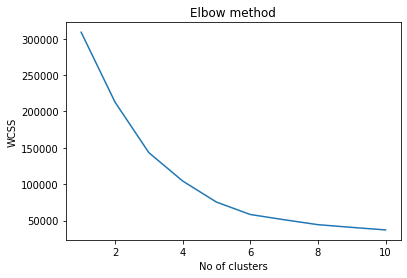

In [106]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters =i, init = 'k-means++',random_state=42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('WCSS')
plt.show()

Training

In [107]:
kmeans = KMeans(n_clusters =5, init = 'k-means++',random_state=42)
y_kmeans = kmeans.fit_predict(X)
#print(np.concatenate((X,y_kmeans.reshape(-1,1)),1))
print(y_kmeans)

[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 3 0 3 1 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 1 3 0 3 0 3
 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0
 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3]


Visualization

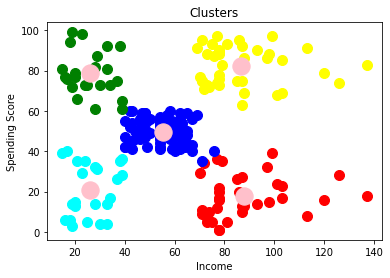

In [109]:
plt.scatter(X[y_kmeans==0,2],X[y_kmeans==0,3],s=100,c='red',label='cluster1')
plt.scatter(X[y_kmeans==1,2],X[y_kmeans==1,3],s=100,c='blue',label='cluster2')
plt.scatter(X[y_kmeans==2,2],X[y_kmeans==2,3],s=100,c='green',label='cluster3')
plt.scatter(X[y_kmeans==3,2],X[y_kmeans==3,3],s=100,c='yellow',label='cluster4')
plt.scatter(X[y_kmeans==4,2],X[y_kmeans==4,3],s=100,c='cyan',label='cluster5')
plt.scatter(kmeans.cluster_centers_[:,2],kmeans.cluster_centers_[:,3],s=300,c = 'pink')
plt.title('Clusters')
plt.xlabel('Income')
plt.ylabel('Spending Score')
plt.show()